https://machinelearningmastery.com/semi-supervised-learning-with-label-spreading/

https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelSpreading.html

https://blockgeni.com/understanding-semi-supervised-learning-with-label-spreading/

https://aicorespot.io/semi-supervised-learning-with-label-spreading/

# Import Library

In [51]:
# Load, explore and plot data
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# %matplotlib inline
# Train test split
from sklearn.model_selection import train_test_split
# Text pre-processing
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping

# Modeling
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Embedding, Dropout, GlobalAveragePooling1D, Flatten, SpatialDropout1D, Bidirectional
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.semi_supervised import LabelSpreading
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

import joblib

# Import Notebook

In [83]:
%run notebook_model_ls.ipynb
%run notebook_model_lstm.ipynb

# import sys
# import os

# # Add the parent directory (adjust path as needed)
# #https://www.geeksforgeeks.org/sys-path-in-python/
# sys.path.append(os.path.abspath('..'))
# # https://www.geeksforgeeks.org/useful-ipython-magic-commands/
# %run ../src/core/auto_labeling.py
# %run ../src/core/core_mappers.py
# %run ../src/core/core_utils.py
# %run ../src/core/model_ls.py
# %run ../src/core/model_lstm.py
# %run ../src/core/text_processor.py






[nltk_data] Downloading package punkt to
[nltk_data]     /Users/lasanthalakmal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lasanthalakmal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/lasanthalakmal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lasanthalakmal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# ASRS

In [4]:
options={
    "is_merge_taxonomy": True
}

# Train

AutoLabeling sample_size= (10000, 5)


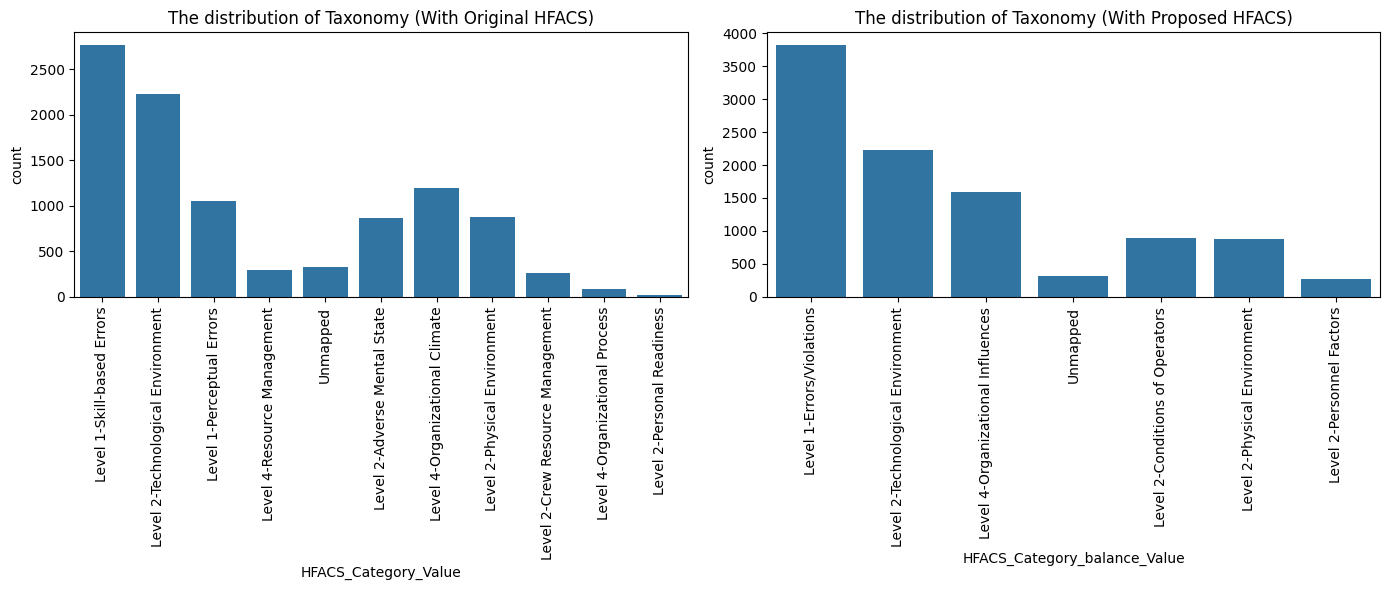

Shape of label tensor: (10000,)
Accuracy on test data: 0.9891640866873065


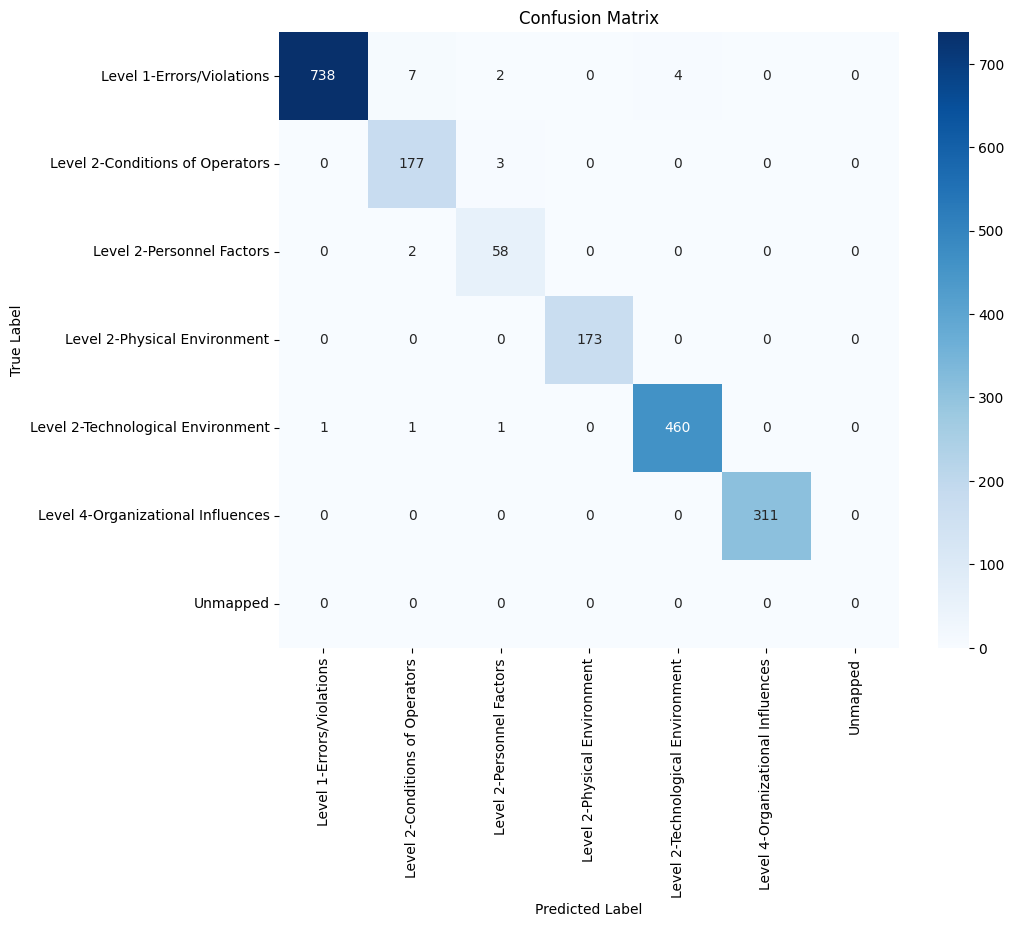

asrs Model and vectorizer saved successfully


In [75]:
# 01. Get Data
asrs_df = CoreUtils.get_data('asrs', from_year=2020, to_year=2024)

options={
    "is_merge_taxonomy": True
}

# 02. Label Spreading
asrs_modelLS = ModelLS({'asrs': asrs_df}, 'asrs', 10000, options=options)
asrs_modelLS.train()

# 03. Apply it new data get predicting label
# asrs_predicted_data = ModelLS.predict(asrs_df, 'asrs', 1, 25000)

# model_data = labeled_data[labeled_data['HFACS_Category_Value_Predict'] != 'Unmapped'].copy()

# 05. Show Label distribution
# show_label(asrs_predicted_data, 'HFACS_Category_Value_Predict')
# asrs_predicted_data

In [77]:
asrs_predicted_data = ModelLS.predict(asrs_df, 'asrs', 1)
asrs_predicted_data

Model and vectorizer loaded successfully
LS sample_size==== 0
Factors Null count 0


,event_id,date,finding_description,narrative_01,narrative_02,HFACS_Category_Value_Predict
102766,1800830,2020-04-01,ATC Equipment / Nav Facility / Buildings,Aircraft X landed and while taxiing to parking...,NaN,Level 4-Organizational Influences
114340,2021216,2023-07-01,Ambiguous,On Day 0 at approximately XA:29 pilot climbed ...,NaN,Level 1-Errors/Violations
178710,1777197,2020-12-01,Procedure,Just a little confusion on my part. I was clea...,NaN,Level 4-Organizational Influences
201393,1714400,2020-01-01,Company Policy,To be clear I did not have a lot going on and ...,NaN,Level 4-Organizational Influences
201394,1714553,2020-01-01,Environment - Non Weather Related,While descending into PIB out of 14;000 ft. MS...,NaN,Level 2-Physical Environment
...,...,...,...,...,...,...
221031,2085076,2024-02-01,Airport,Cleared by ground to leave FBO ramp via taxiwa...,NaN,Level 4-Organizational Influences
221032,2085081,2024-02-01,Time Pressure; Troubleshooting:Navigational Eq...,On approach to Runway 34L I had a LOC/coupling...,NaN,Level 1-Errors/Violations
221033,2085092,2024-02-01,Procedure,Sequencing and separation of aircraft are noto...,NaN,Level 4-Organizational Influences
221034,2085412,2024-02-01,Airspace Structure,CYEG HAMPO 2 Departure Runway 20. On our brief...,NaN,Level 4-Organizational Influences


The DataFrame is None
Data loaded
Start labelling
Model and vectorizer loaded successfully
LS sample_size==== 500
Factors Null count 0
Ladled Sampling size= (500, 6)
start pre_process_df
combined_narrative
clean_feature
drop_narratives
preprocess_narrative
event_id                        0
date                            0
finding_description             0
HFACS_Category_Value_Predict    0
narrative                       0
narrative_length                0
narrative_word_count            0
narrative_sentence_count        0
dtype: int64
      event_id        date                                finding_description  \
9616   2060590  2023-12-01  Situational Awareness; Workload:GPS & Other Sa...   
9617   2060625  2023-12-01  Human Factors:Troubleshooting:Aircraft Equipme...   
9618   2060637  2023-12-01                                          Ambiguous   
9619   2060669  2023-12-01  Human Factors:Communication Breakdown:Deviatio...   
9620   2060677  2023-12-01  Human Factors:Distraction

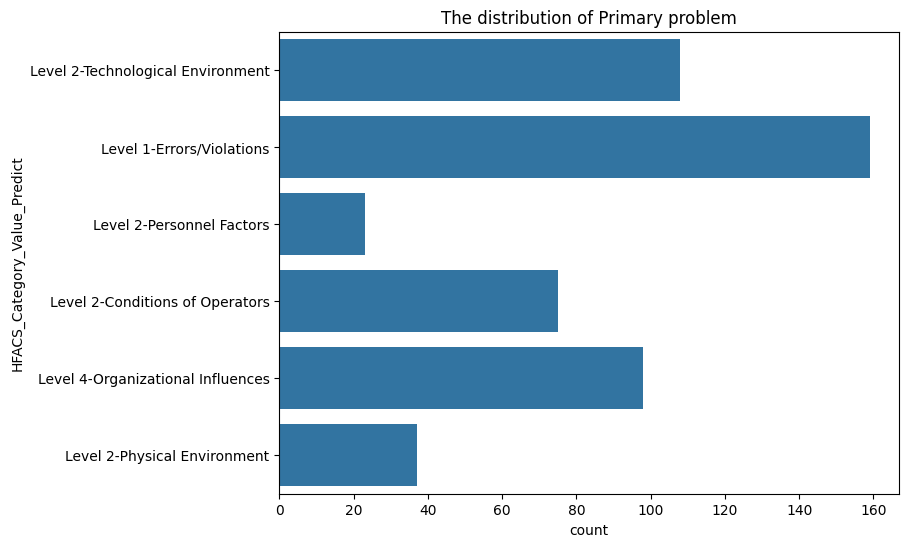

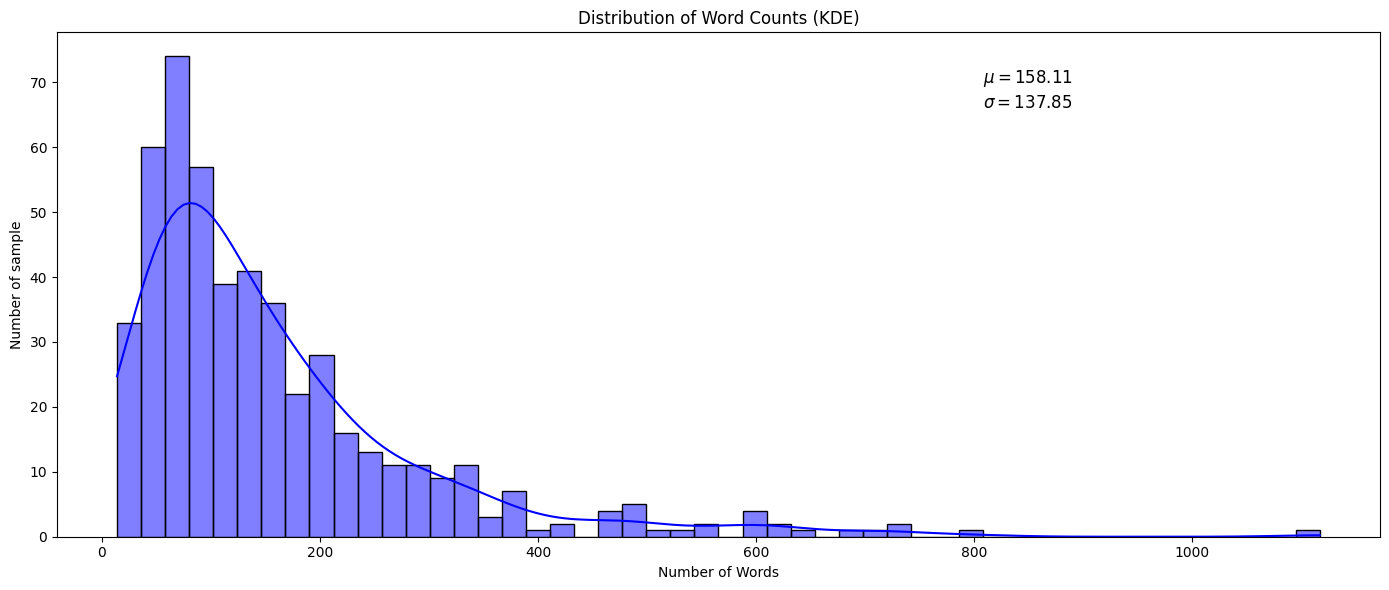

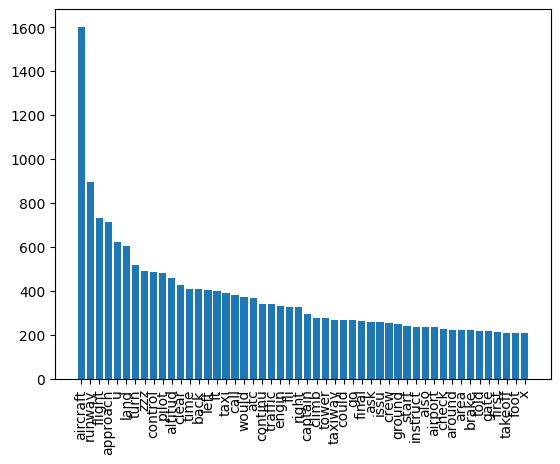

Total unique words: 5838
Define Y
Shape of label tensor: (500,)
Define X
Found 5839 unique tokens.
Shape of data tensor: (500, 200)
(450, 200) (450,)
(50, 200) (50,)
Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 179ms/step - accuracy: 0.2234 - loss: 1.8017 - val_accuracy: 0.2222 - val_loss: 1.8015
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 147ms/step - accuracy: 0.3315 - loss: 1.7952 - val_accuracy: 0.2667 - val_loss: 1.7990
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 174ms/step - accuracy: 0.3567 - loss: 1.7892 - val_accuracy: 0.2889 - val_loss: 1.7961
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 267ms/step - accuracy: 0.3225 - loss: 1.7814 - val_accuracy: 0.2889 - val_loss: 1.7922
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 205ms/step - accuracy: 0.3348 - loss: 1.7702 - val_accuracy: 0.2889 - val_loss: 1.7864
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 202ms/step - accuracy: 0.3190 - loss: 1.7471 - val_accuracy: 0.2889 - val_loss: 1.7773
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 213ms/step - accuracy: 0

/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metrics/_class

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


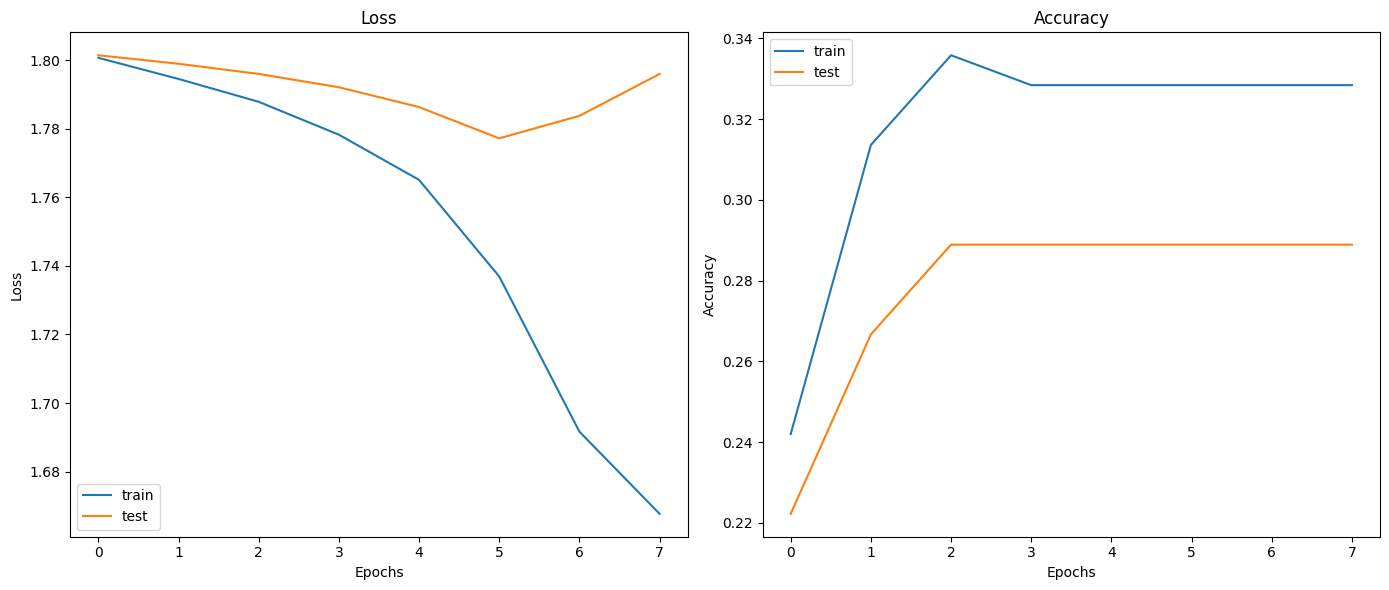

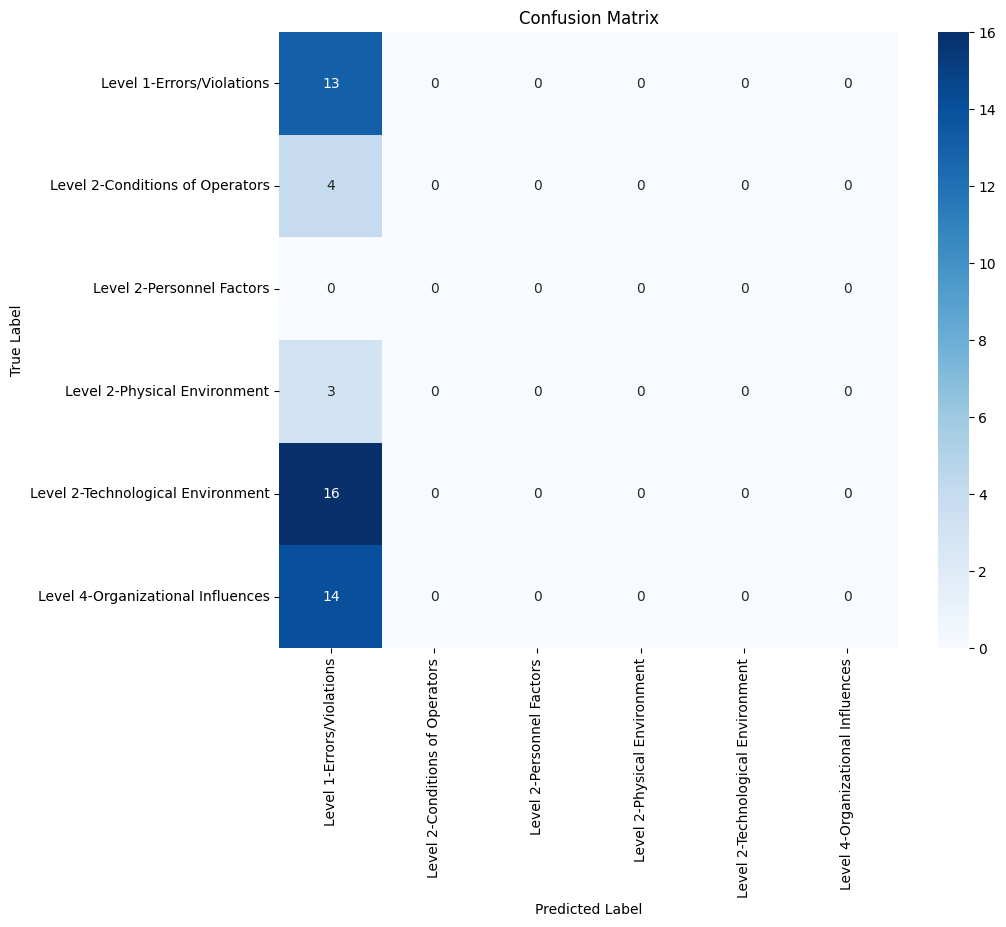

Accuracy: 0.2600
Macro F1 Score: 0.0825
Micro F1 Score: 0.2600
Weighted F1 Score: 0.1073


In [86]:
from sklearn.metrics import f1_score, accuracy_score


# 01. Get Data
asrs_df = CoreUtils.get_data('asrs', from_year=2023, to_year=2024)
dfs = { 'asrs': asrs_df }

asrs_lstm_Model = LSTMModel(None, ds_name='asrs', ls_version=1, sample_size=500, max_length=200, max_nb_words=20000, is_enable_smote=False)
asrs_lstm_Model.train()
evaluate_result = asrs_lstm_Model.evaluate()

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
y_true = asrs_lstm_Model.Y_test
y_pred = asrs_lstm_Model.Y_pred


accuracy = accuracy_score(y_true, y_pred)
macro_f1_score = f1_score(y_true, y_pred, average='macro')
micro_f1_score = f1_score(y_true, y_pred, average='micro')
weighted_f1_score = f1_score(y_true, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Macro F1 Score: {macro_f1_score:.4f}')
print(f'Micro F1 Score: {micro_f1_score:.4f}')
print(f'Weighted F1 Score: {weighted_f1_score:.4f}')


# lstm_Model.
# lstm_Model.tra

# NTSB

AutoLabeling sample_size= (10000, 5)


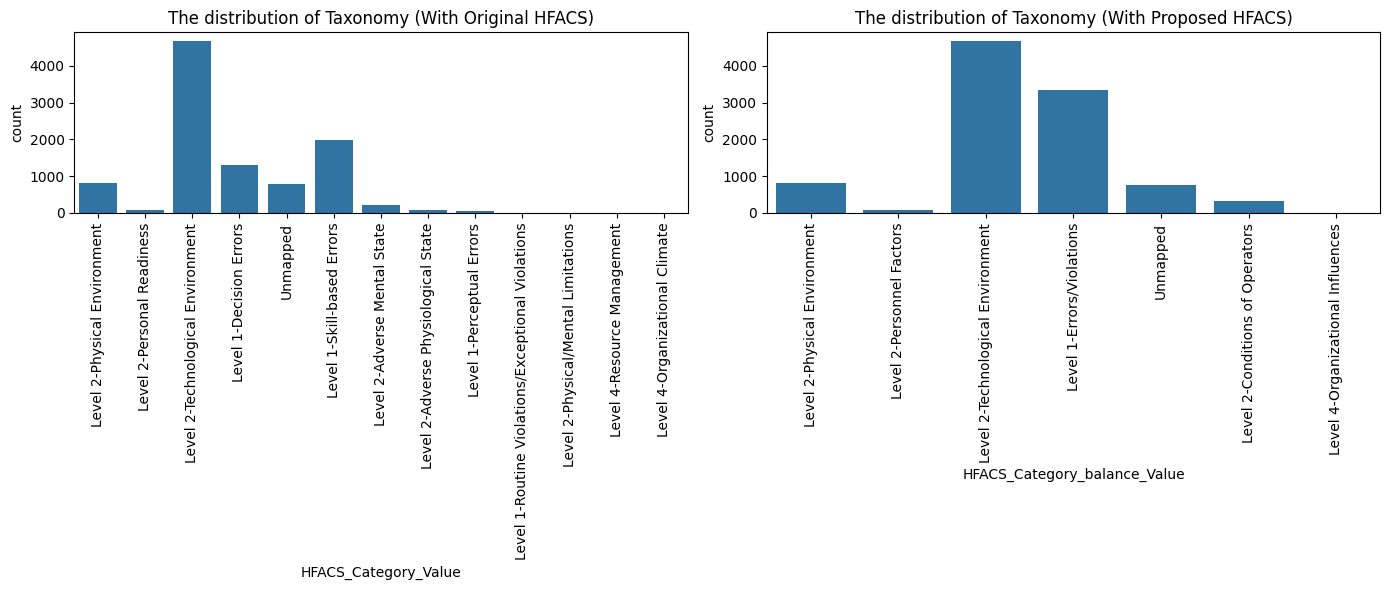

Shape of label tensor: (10000,)
Accuracy on test data: 1.0


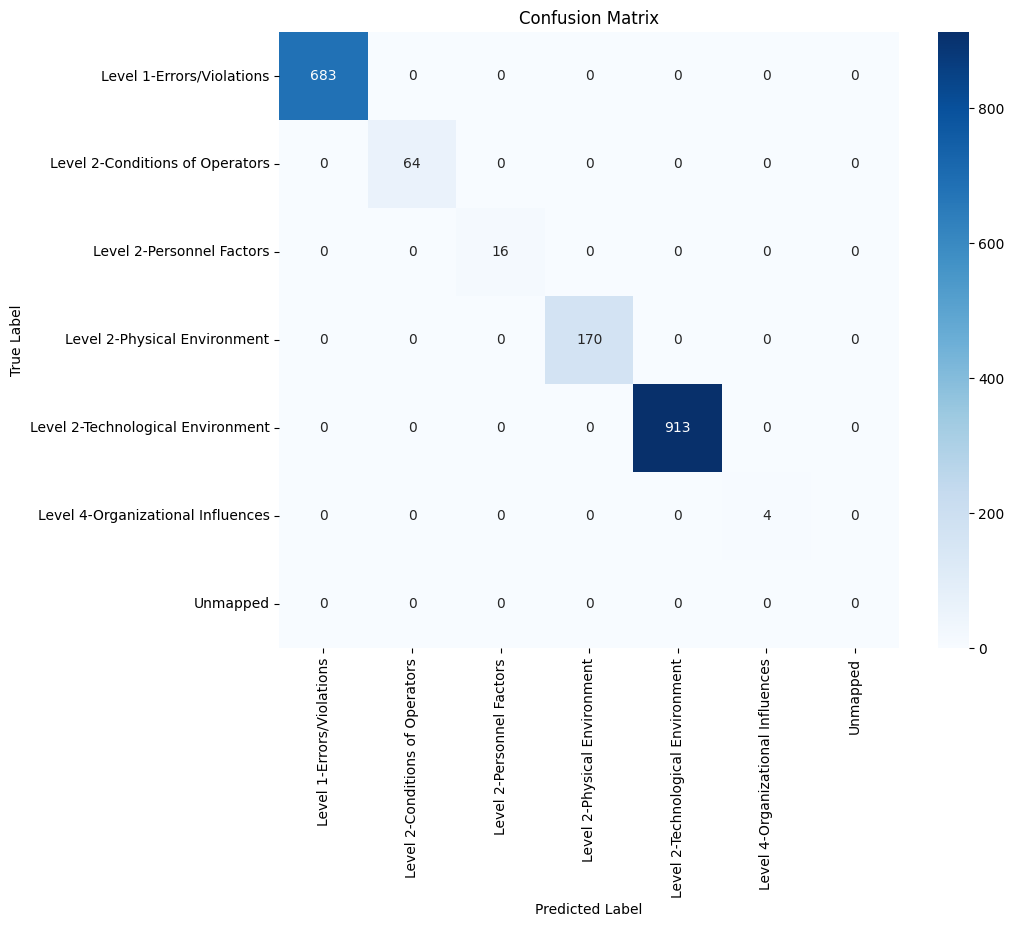

ntsb Model and vectorizer saved successfully


In [74]:
# 01. Get Data
ntsb_df = CoreUtils.get_data('ntsb', from_year=2000, to_year=2024)


ntsb_modelLS = ModelLS({'ntsb': ntsb_df}, 'ntsb', 10000, options=options)
ntsb_modelLS.train()

# 04. Apply it new data get predicting label
# ntsb_predicted_data = ntsb_modelLS.predict(ntsb_df, 25000)

# model_data = labeled_data[labeled_data['HFACS_Category_Value_Predict'] != 'Unmapped'].copy()

# 05. Show Lablel distribution
# show_label(ntsb_predicted_data, 'HFACS_Category_Value_Predict')
# ntsb_predicted_data.to_csv('data_ntsb_sample_with_label.csv')
# ntsb_predicted_data

The DataFrame is None
Data loaded
Start labelling
Model and vectorizer loaded successfully
LS sample_size==== 500
Factors Null count 0
Ladled Sampling size= (500, 6)
start pre_process_df
combined_narrative
clean_feature
drop_narratives
preprocess_narrative
event_id                        0
date                            0
finding_description             0
HFACS_Category_Value_Predict    0
narrative                       0
narrative_length                0
narrative_word_count            0
narrative_sentence_count        0
dtype: int64
           event_id        date  \
182  20220526105136  2022-05-01   
183  20220526105138  2022-05-01   
184  20220527105139  2022-05-01   
185  20220528105141  2022-05-01   
186  20220528105142  2022-05-01   

                                   finding_description  \
182  Aircraft-Aircraft oper/perf/capability-Perform...   
183  Personnel issues-Task performance-Use of equip...   
184  Aircraft-Aircraft systems-Fuel system-Fuel dis...   
185  Aircraft-A

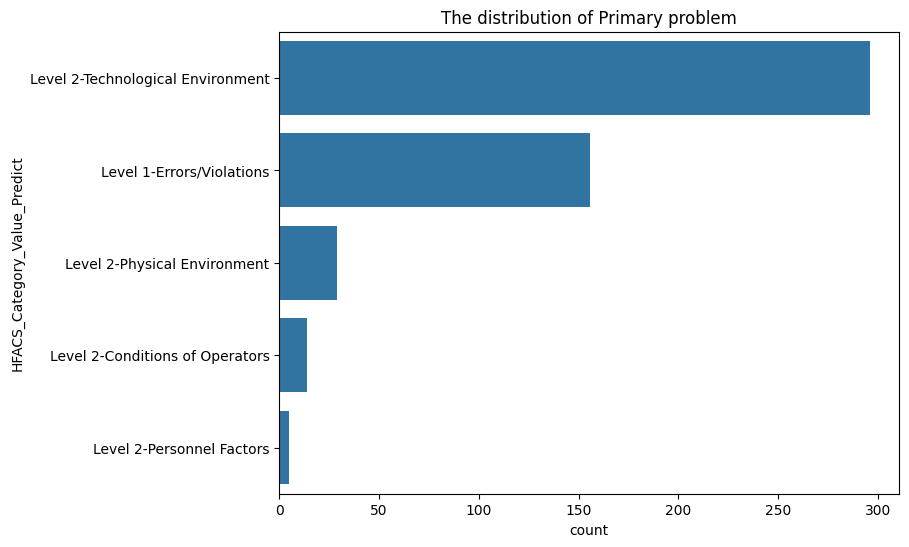

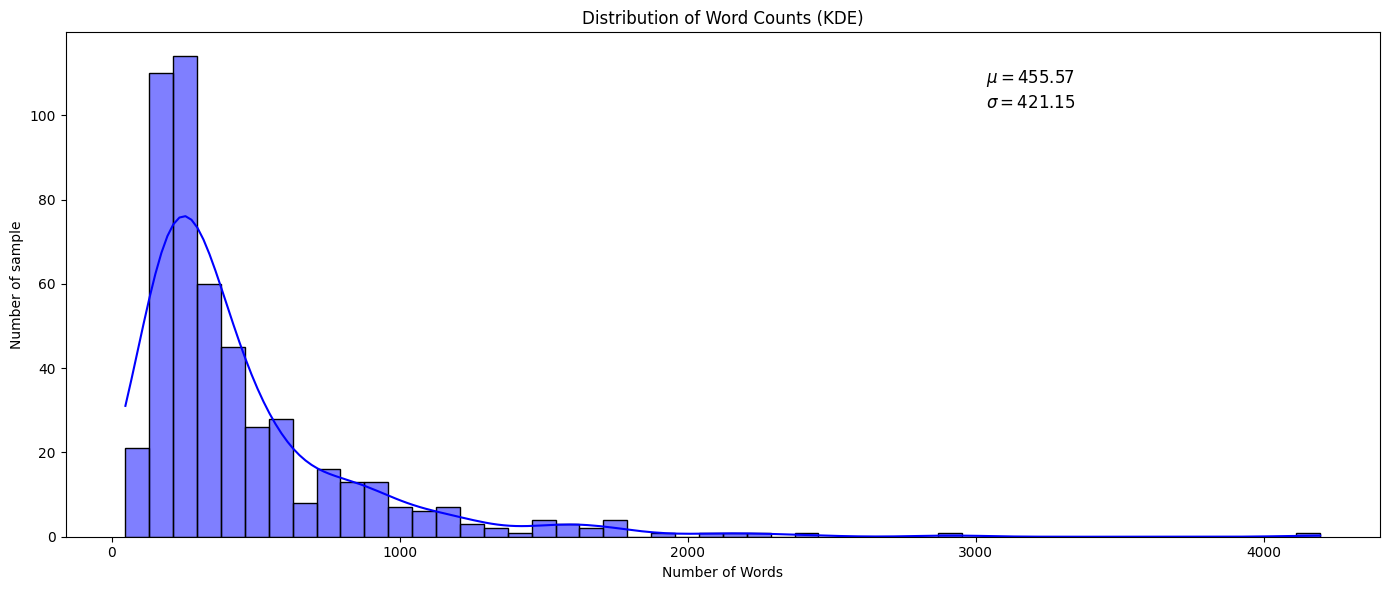

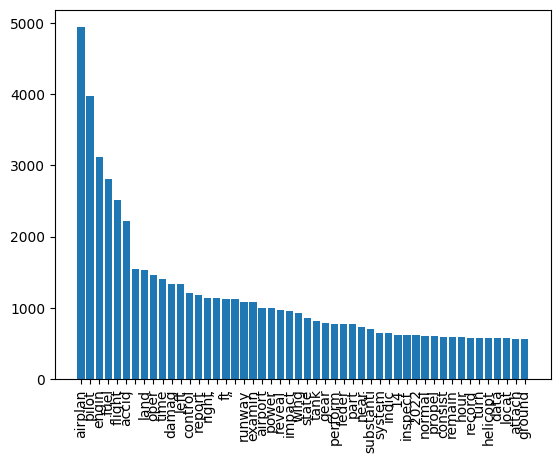

Total unique words: 13532
Define Y
Shape of label tensor: (500,)
Define X
Found 13533 unique tokens.
Shape of data tensor: (500, 200)
(450, 200) (450,)
(50, 200) (50,)
Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 201ms/step - accuracy: 0.2444 - loss: 1.6167 - val_accuracy: 0.4000 - val_loss: 1.6089
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 163ms/step - accuracy: 0.5349 - loss: 1.6022 - val_accuracy: 0.4889 - val_loss: 1.5951
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 237ms/step - accuracy: 0.5887 - loss: 1.5858 - val_accuracy: 0.5111 - val_loss: 1.5748
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 194ms/step - accuracy: 0.5933 - loss: 1.5589 - val_accuracy: 0.5111 - val_loss: 1.5373
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 180ms/step - accuracy: 0.6119 - loss: 1.5059 - val_accuracy: 0.5111 - val_loss: 1.4471
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 168ms/step - accuracy: 0.6256 - loss: 1.3609 - val_accuracy: 0.5111 - val_loss: 1.1884
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 168ms/step - accuracy: 

/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metrics/_class

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


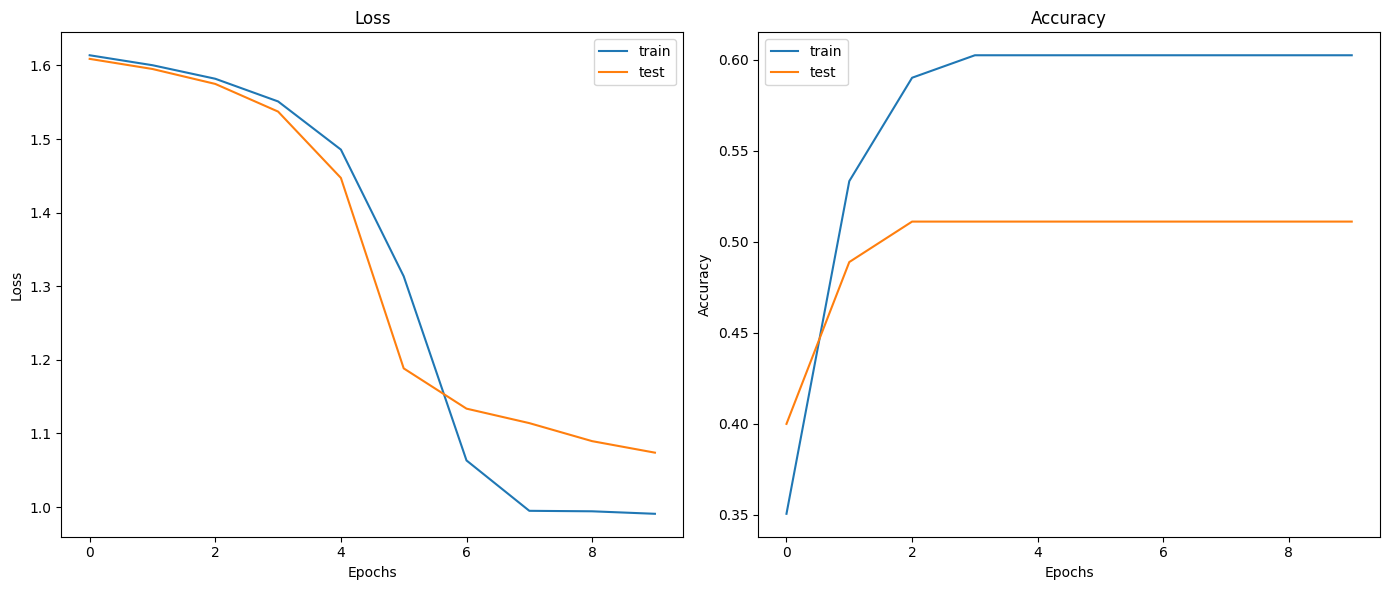

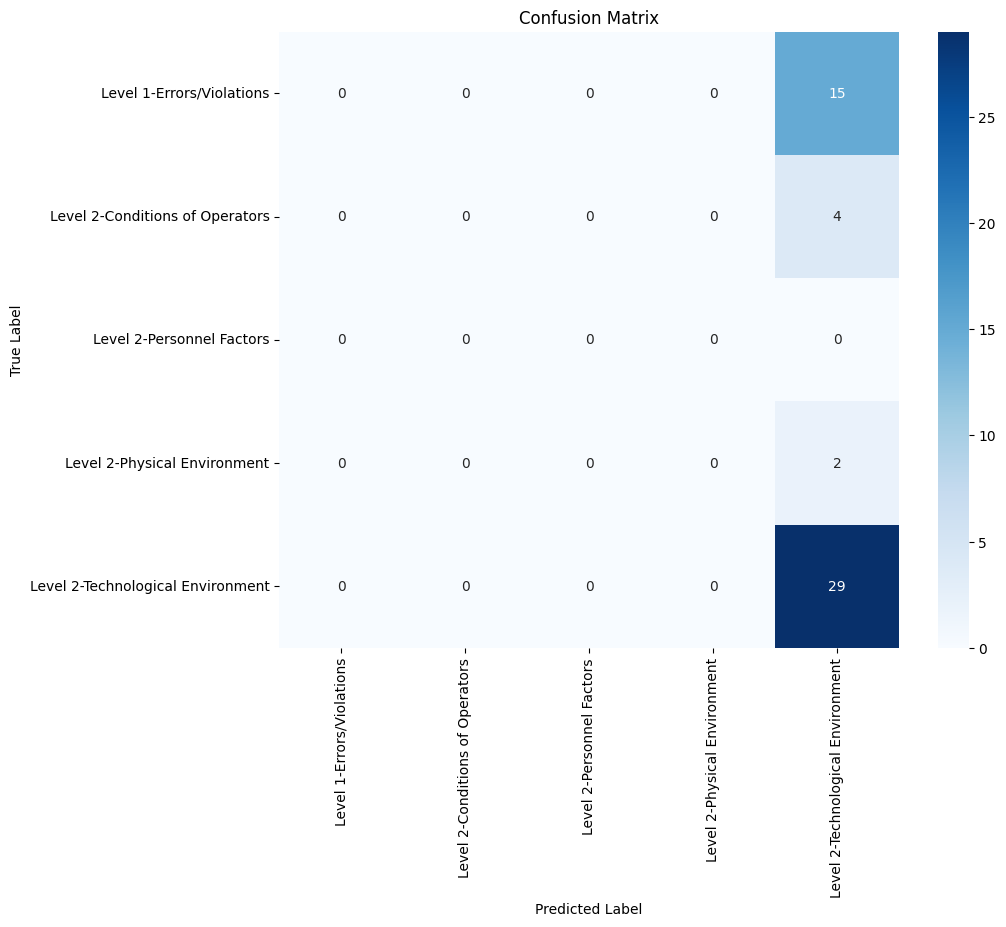

Accuracy: 0.5800
Macro F1 Score: 0.1835
Micro F1 Score: 0.5800
Weighted F1 Score: 0.4258


In [87]:
from sklearn.metrics import f1_score, accuracy_score

# 01. Get Data
ntsb_df = CoreUtils.get_data('ntsb', from_year=2020, to_year=2023)
dfs = { 'ntsb': ntsb_df }

ntsb_lstm_Model = LSTMModel(None, ds_name='ntsb', ls_version=1, sample_size=500, max_length=200, max_nb_words=20000, is_enable_smote=False)
ntsb_lstm_Model.train()
ntsb_evaluate_result = ntsb_lstm_Model.evaluate()


y_true = ntsb_lstm_Model.Y_test
y_pred = ntsb_lstm_Model.Y_pred

accuracy = accuracy_score(y_true, y_pred)
macro_f1_score = f1_score(y_true, y_pred, average='macro')
micro_f1_score = f1_score(y_true, y_pred, average='micro')
weighted_f1_score = f1_score(y_true, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Macro F1 Score: {macro_f1_score:.4f}')
print(f'Micro F1 Score: {micro_f1_score:.4f}')
print(f'Weighted F1 Score: {weighted_f1_score:.4f}')

# ASRS & NTSB (Combination)

AutoLabeling sample_size= (10000, 5)


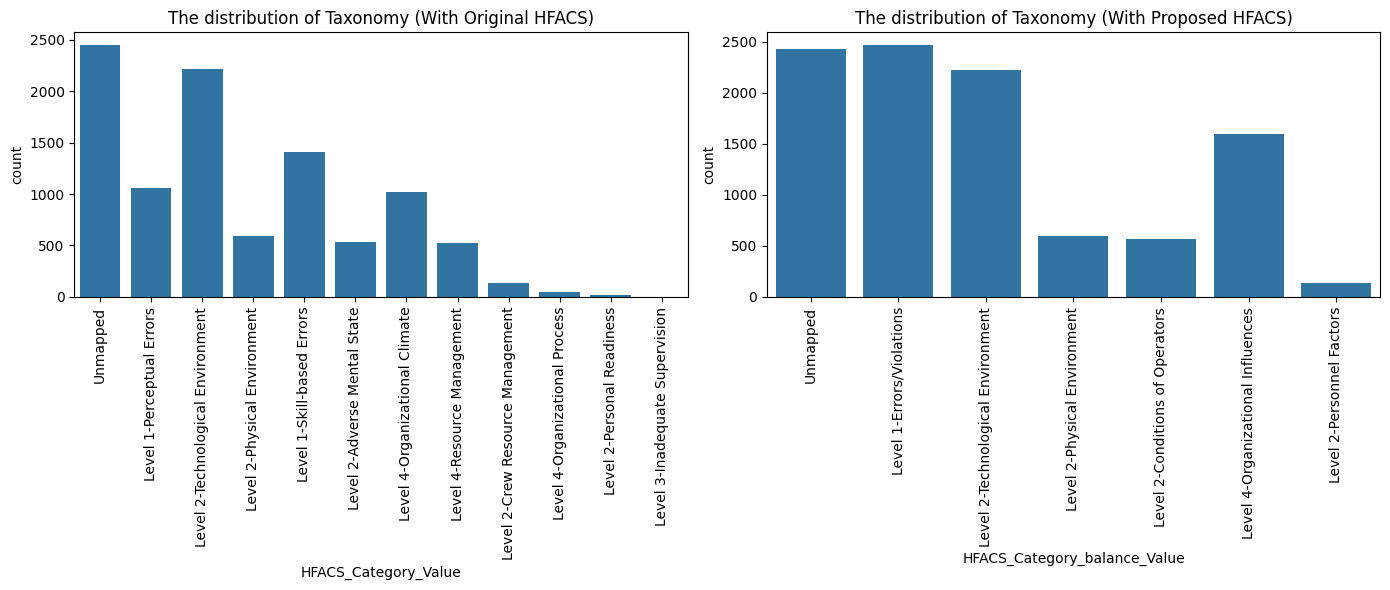

AutoLabeling sample_size= (10000, 5)


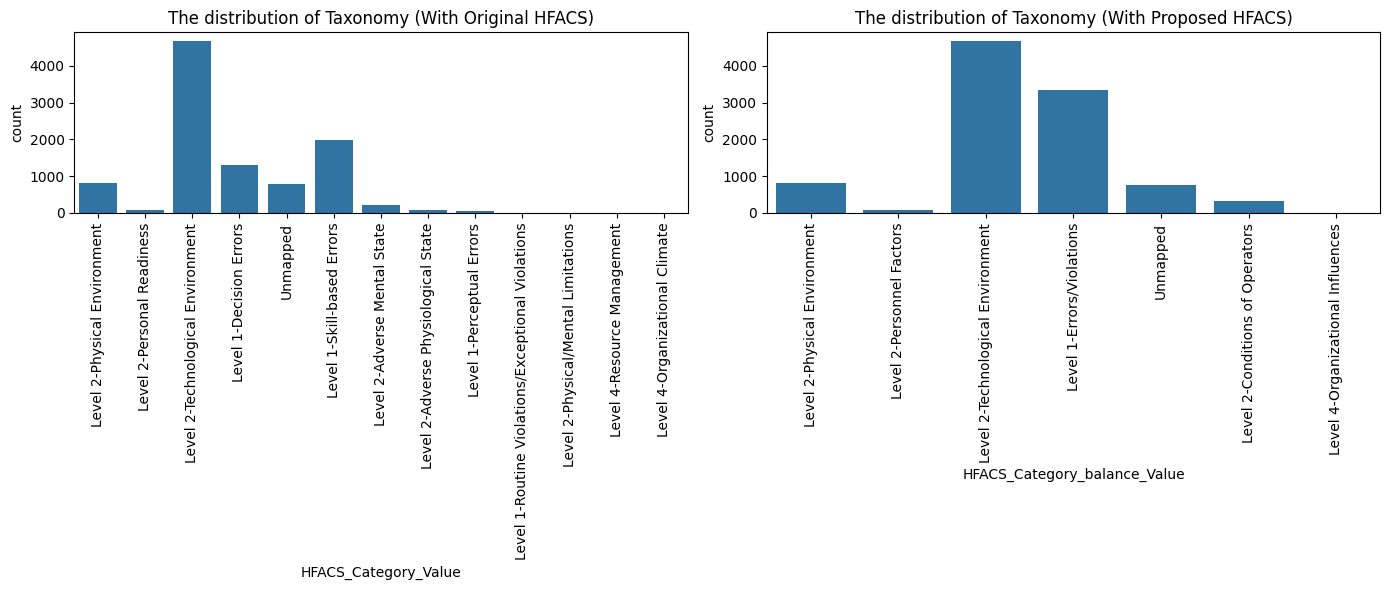

Shape of label tensor: (20000,)
Accuracy on test data: 0.995243757431629


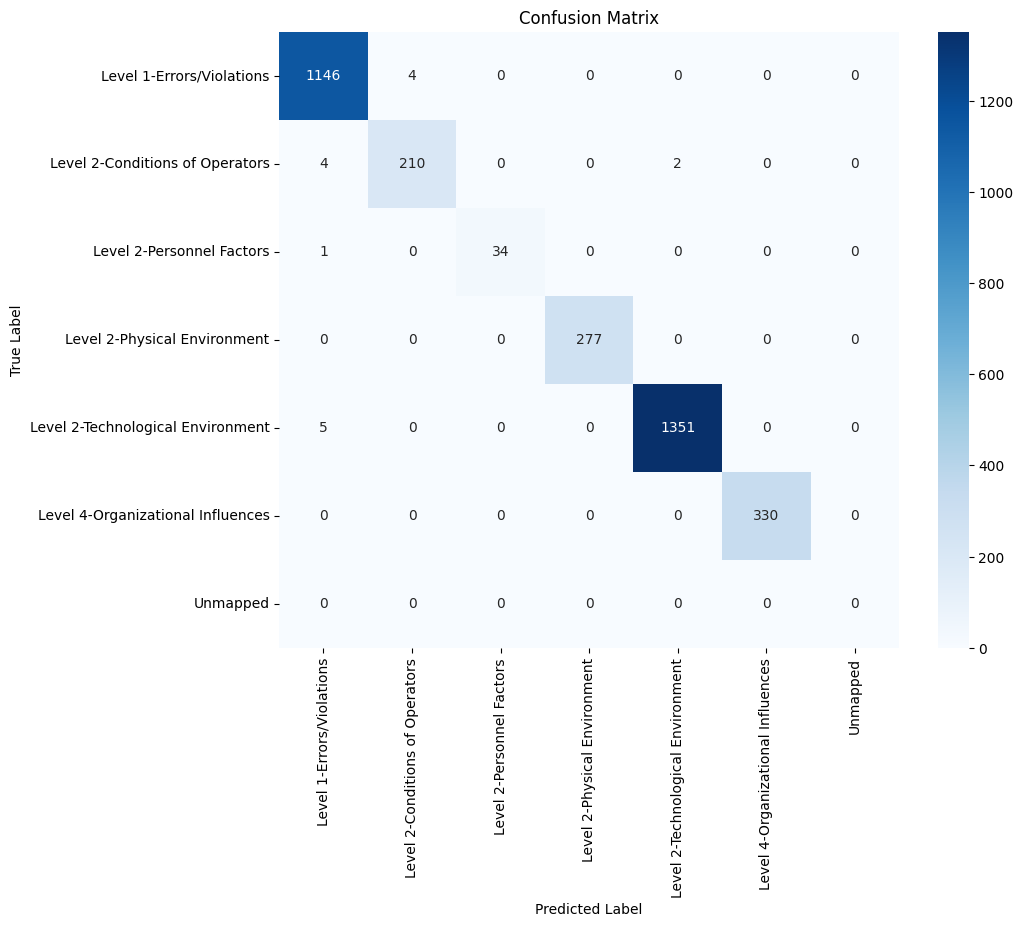

asrs_ntsb Model and vectorizer saved successfully


In [71]:
# 01. Manual Labeling with specific sample
asrs_df = CoreUtils.get_data('asrs', from_year=2000, to_year=2024)
ntsb_df = CoreUtils.get_data('ntsb', from_year=2000, to_year=2024)

asrs_ntsb_modelLS = ModelLS({'asrs': asrs_df, 'ntsb': ntsb_df}, 'asrs_ntsb', 10000, options=options)
asrs_ntsb_modelLS.train()

The DataFrame is None
Data loaded
Start labelling
Model and vectorizer loaded successfully
LS sample_size==== 2000
Factors Null count 0
Ladled Sampling size= (2000, 6)
start pre_process_df
combined_narrative
clean_feature
drop_narratives
preprocess_narrative
event_id                        0
date                            0
finding_description             0
HFACS_Category_Value_Predict    0
narrative                       0
narrative_length                0
narrative_word_count            0
narrative_sentence_count        0
dtype: int64
     event_id        date                                finding_description  \
8798  2039086  2023-09-01                                          Procedure   
8799  2039087  2023-09-01  Workload; Time Pressure; Troubleshooting:Brake...   
8800  2039100  2023-09-01  Workload; Time Pressure; Physiological - Other...   
8801  2039126  2023-09-01  Communication Breakdown; Situational Awareness...   
8802  2039132  2023-09-01                               

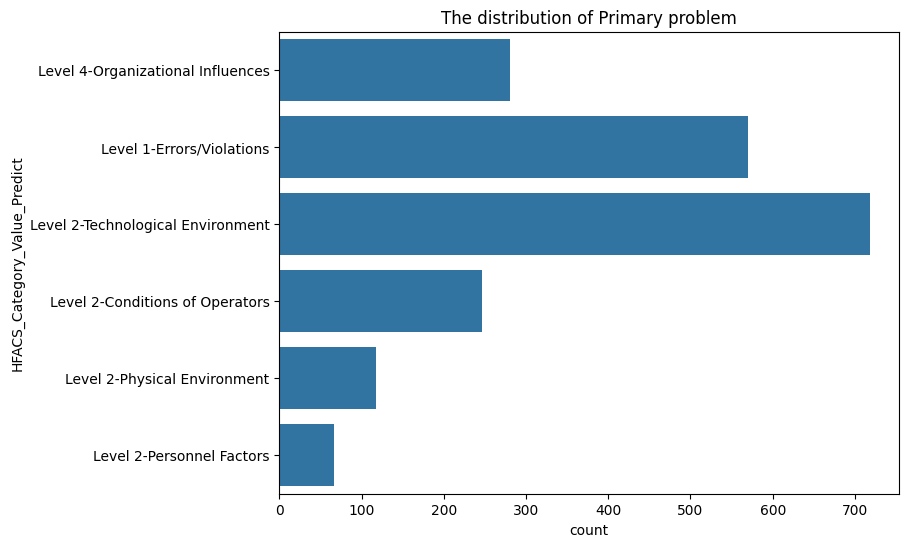

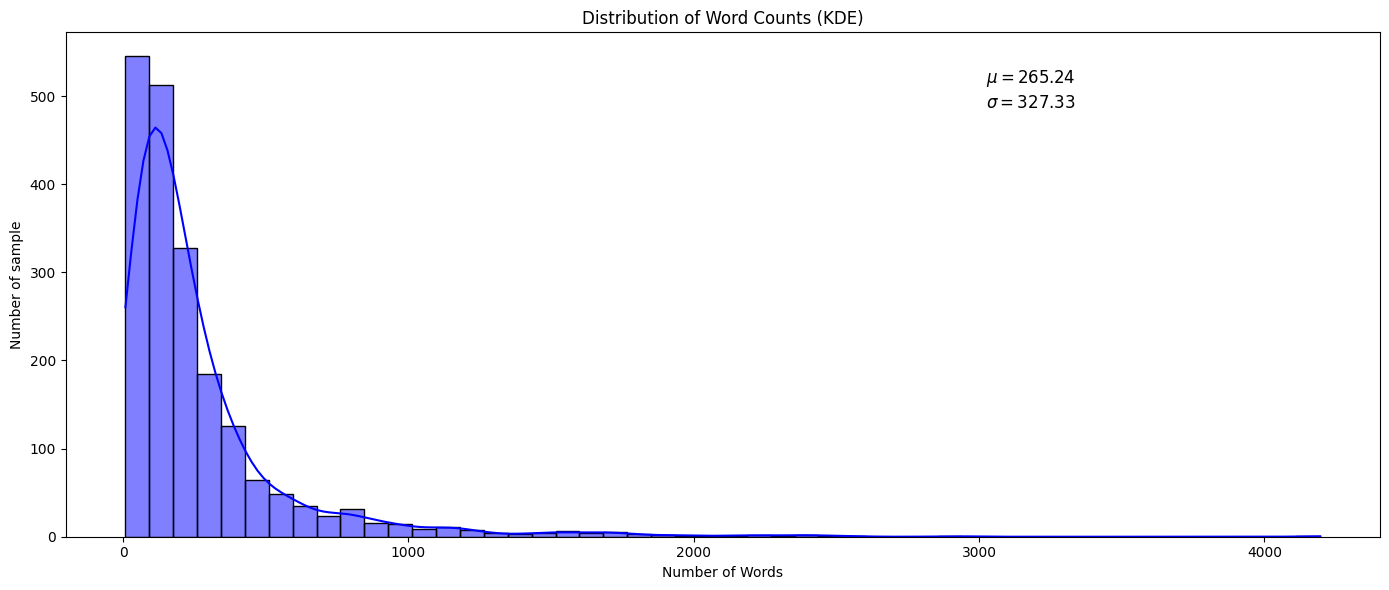

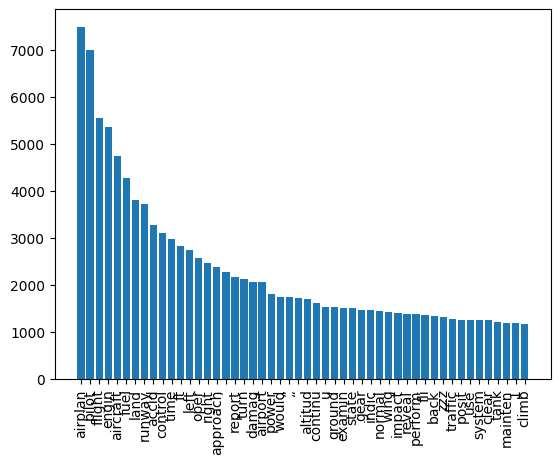

Total unique words: 21748
Define Y
Shape of label tensor: (2000,)
Define X
Found 21749 unique tokens.
Shape of data tensor: (2000, 300)
(1800, 300) (1800,)
(200, 300) (200,)
Epoch 1/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 22s 313ms/step - accuracy: 0.2834 - loss: 1.7952 - val_accuracy: 0.3278 - val_loss: 1.7660
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 13s 253ms/step - accuracy: 0.3711 - loss: 1.7225 - val_accuracy: 0.3278 - val_loss: 1.5561
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 13s 251ms/step - accuracy: 0.3591 - loss: 1.5555 - val_accuracy: 0.3278 - val_loss: 1.4871
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 13s 247ms/step - accuracy: 0.3554 - loss: 1.4737 - val_accuracy: 0.3667 - val_loss: 1.4367
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 13s 259ms/step - accuracy: 0.4041 - loss: 1.4028 - val_accuracy: 0.4000 - val_loss: 1.4222
Epoch 6/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 13s 251ms/step - accuracy: 0.4514 - loss: 1.3209 - val_accuracy: 0.4556 - val_loss: 1.4050
Epoch 7/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 13s 263ms/step

/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metric

63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step


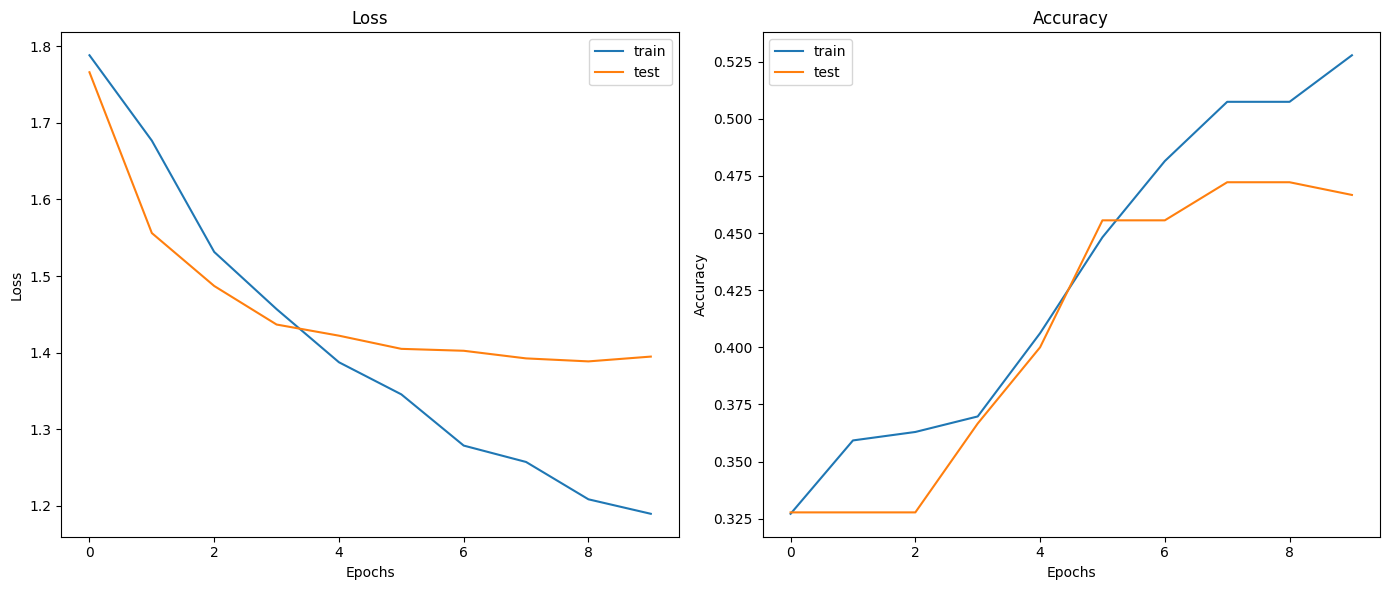

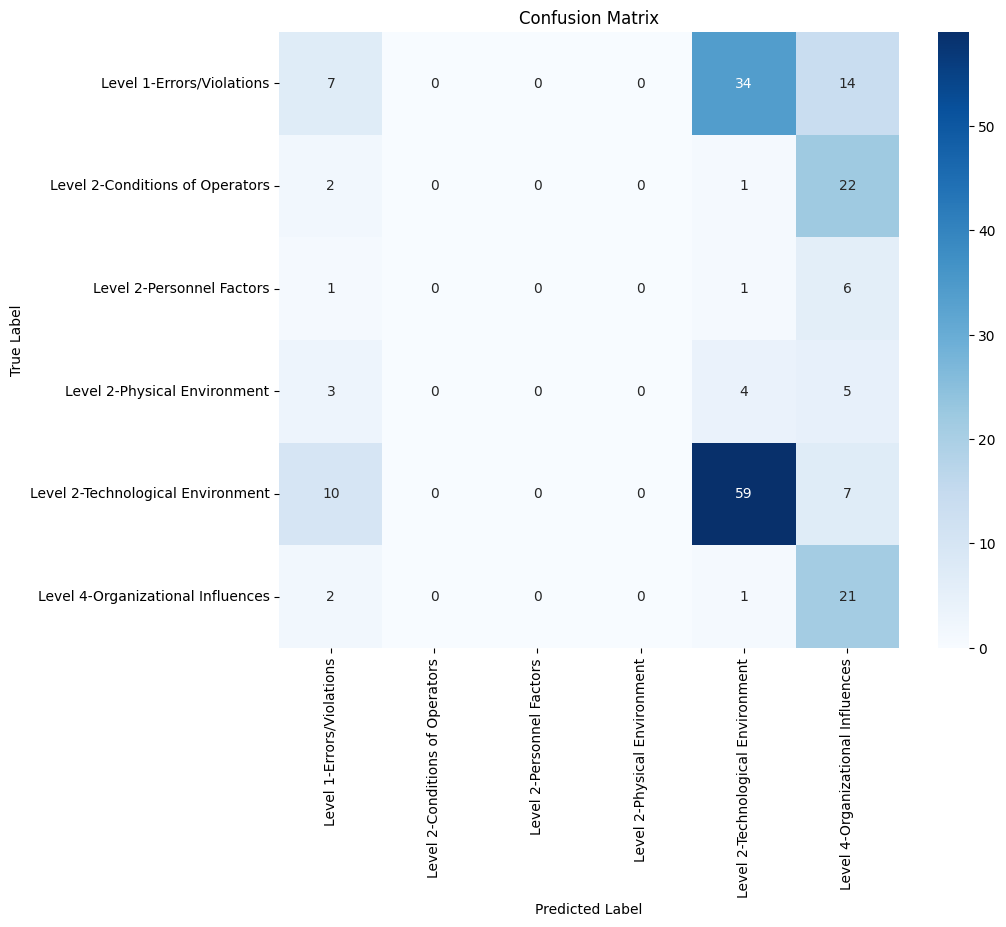

Accuracy: 0.4350
Macro F1 Score: 0.2116
Micro F1 Score: 0.4350
Weighted F1 Score: 0.3538


In [89]:

from sklearn.metrics import f1_score, accuracy_score

asrs_df = CoreUtils.get_data('asrs', from_year=2023, to_year=2024)
ntsb_df = CoreUtils.get_data('ntsb', from_year=2020, to_year=2023)
asrs_ntsb_df =  pd.concat([asrs_df, ntsb_df], axis=0).reset_index(drop=True)
dfs = { 'asrs_ntsb': asrs_ntsb_df }

asrs_ntsb_lstm_Model = LSTMModel(None, ds_name='asrs_ntsb', ls_version=1, sample_size=1000, max_length=300, max_nb_words=50000, is_enable_smote=False)
asrs_ntsb_lstm_Model.train()
asrs_ntsb_evaluate_result = asrs_ntsb_lstm_Model.evaluate()


y_true = asrs_ntsb_lstm_Model.Y_test
y_pred = asrs_ntsb_lstm_Model.Y_pred

accuracy = accuracy_score(y_true, y_pred)
macro_f1_score = f1_score(y_true, y_pred, average='macro')
micro_f1_score = f1_score(y_true, y_pred, average='micro')
weighted_f1_score = f1_score(y_true, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Macro F1 Score: {macro_f1_score:.4f}')
print(f'Micro F1 Score: {micro_f1_score:.4f}')
print(f'Weighted F1 Score: {weighted_f1_score:.4f}')